In [3]:
import json
from collections import Counter

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2

In [165]:
def generate_word_cloud(album_name, songs_data_file, image_mask, colormap=None, flip_image=False, 
                        white_threshold=100, stopwords_file='stopwords.txt', background_color='whitesmoke', 
                        max_words=400, output_file=None):
    
    # load data thas has been scraped
    with open(songs_data_file) as json_file:
        songs_data = json.load(json_file)
    
    # combine all lyrics in the album into one long text
    songs = songs_data[album_name]['songs']
    songs_lyrics = ''
    for song in songs:
        songs_lyrics += song['lyrics']
    
    # load stopwords to get rid low impact, high frequency words
    f = open(stopwords_file, 'r')
    stopwords = f.read().split()
    
    # load mask image
    mask = cv2.imread(image_mask)
    
    # if colormap is specified, the image needs to be turn into 0 (black) and 255 (white) pixel only.
    # if not, use colour from the image itself.
    if colormap:
        # change image colour format to gray (single channel)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        if flip_image:
            mask = cv2.flip(mask, 1)
            
        # any pixel with value > white_threshold will be converted into 255, anything less to 0
        def transform_format(val): return 255 if val > white_threshold else 0
        
        transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

        for i in range(len(mask)):
            transformed_mask[i] = list(map(transform_format, mask[i]))

        # creating wordcloud
        wcloud = WordCloud(collocations=False,
                           stopwords=stopwords,
                           mask=transformed_mask,
                           background_color=background_color,
                           colormap=colormap,
                           max_words=max_words).generate(songs_lyrics)
        
        plt.figure(figsize=(10,10))
        plt.imshow(wcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        
    else:
        # # change image colour format to RGB
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

        # create word_cloud
        wcloud = WordCloud(collocations=False,
                   stopwords=stopwords,
                   background_color=background_color,
                   mask=mask,
                   max_words=max_words,
                  ).generate(songs_lyrics)
        
        image_colors = ImageColorGenerator(mask)
        plt.figure(figsize=[10,10])
        plt.imshow(wcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")
        plt.show()
    
    if output_file:
        wcloud.to_file(output_file)

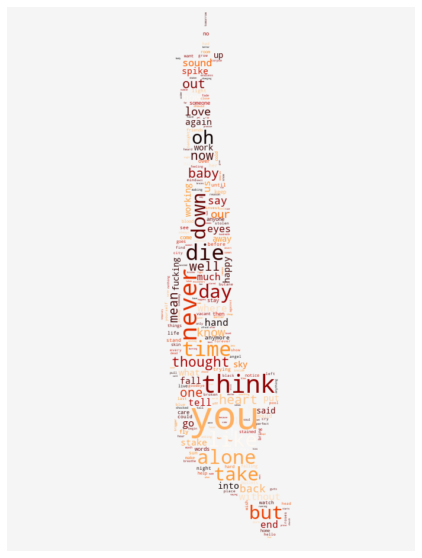

In [166]:
generate_word_cloud('I Brought You My Bullets, You Brought Me Your Love', 
                    'mcr_songs_clean.json',
                    'mask_images/bullet_img.png',
                    colormap='gist_heat',
                    output_file='output_images/bullets_wcloud.png'
                   )

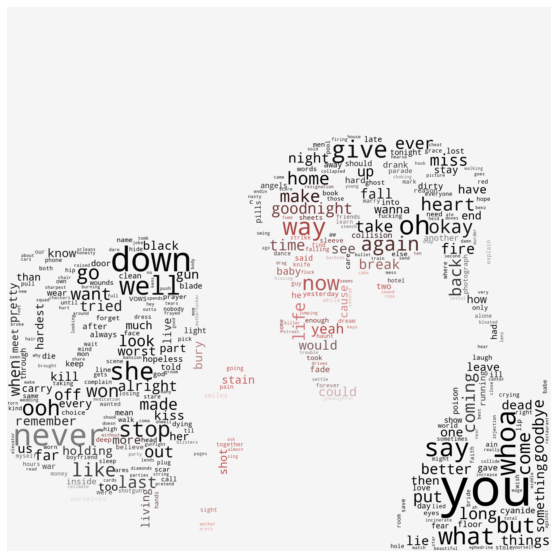

In [167]:
generate_word_cloud('Three Cheers For Sweet Revenge', 
                    'mcr_songs_clean.json',
                    'mask_images/cheers_img.png',
                    output_file='output_images/cheers_wcloud.png'
                   )

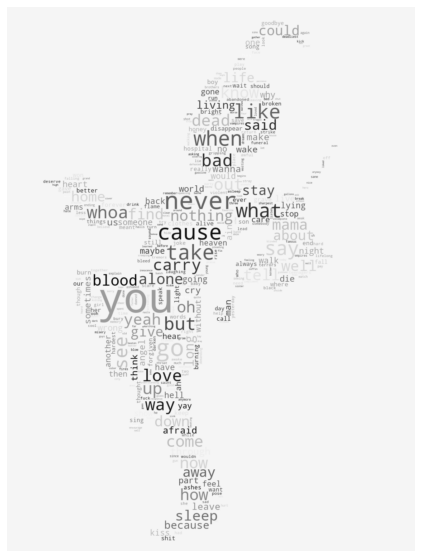

In [169]:
generate_word_cloud('The Black Parade', 
                    'mcr_songs_clean.json',
                    'mask_images/black_img.png',
                    colormap='gray',
                    flip_image=True,
                    output_file='output_images/black_wcloud.png'
                   )

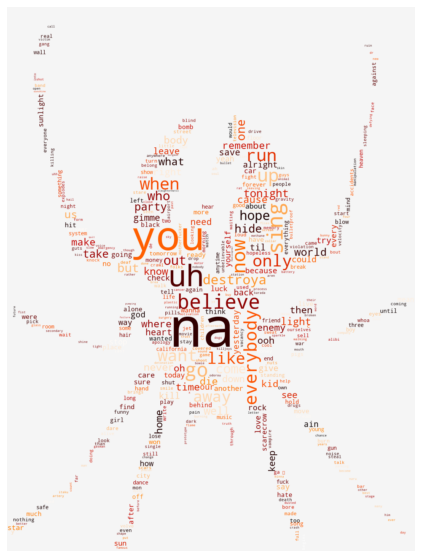

In [174]:
generate_word_cloud('Danger Days: The True Lives Of The Fabulous Killjoys', 
                    'mcr_songs_clean.json',
                    'mask_images/danger_img.png',
                    colormap='gist_heat',
                    output_file='output_images/danger_wcloud.png'
                   )

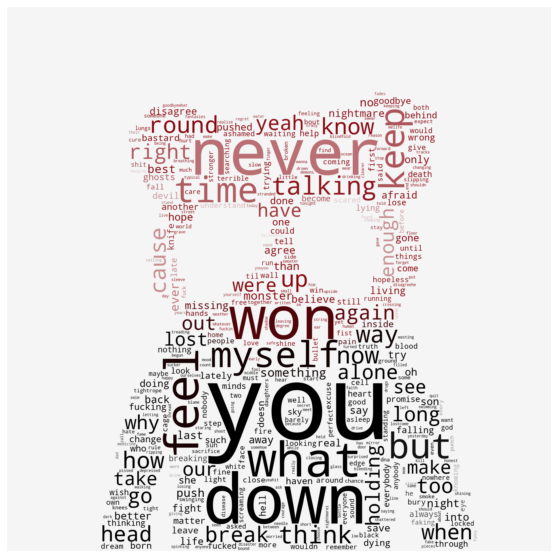

In [179]:
generate_word_cloud('How It Feels To Be Lost', 
                    'sws_songs_clean.json',
                    'mask_images/sws_img.jpg',
                    output_file='output_images/sws_wcloud.png'
                   )